<a href="https://colab.research.google.com/github/JL-plusUltra/DataScience/blob/main/Walmart_TS_group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib

from statsmodels.tsa.stattools import adfuller
import pandas.util.testing as tm
import datetime
#merged_Data = pd.merge(data, data2)

In [ ]:
data = pd.read_csv('/content/W_features.csv')

In [ ]:
data['Date'] =pd.to_datetime(data['Date'].str[0:10])

In [ ]:
#data['Date'], data['Fuel_Price'] = zip(*sorted(zip(data['Date'], data['Fuel_Price'])))

In [ ]:
#data = data.set_index('Date')

In [ ]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0


In [ ]:
data['Fuel_Price'] =data['Fuel_Price'].fillna(data['Fuel_Price'].median())
data['Temperature']=data['Temperature'].fillna(data['Temperature'].median())
data['Unemployment']=data['Unemployment'].fillna(data['Unemployment'].median())
data['CPI']=data['CPI'].fillna(data['CPI'].median())

In [ ]:
data['Fuel_Price'] =data['Fuel_Price']/data['Fuel_Price'].max()
data['Temperature']=data['Temperature']/data['Temperature'].max()
data['Unemployment']=data['Unemployment']/data['Unemployment'].max()
data['CPI']=data['CPI']/data['CPI'].max()

In [ ]:
data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI                0
Unemployment       0
IsHoliday          0
dtype: int64

In [ ]:
data = data.fillna(0)

In [ ]:
data.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,0.415007,0.575649,0.0,0.0,0.0,0.0,0.0,0.921913,0.566338,0
1,1,2010-02-12,0.377734,0.570278,0.0,0.0,0.0,0.0,0.0,0.922550,0.566338,1
2,1,2010-02-19,0.391663,0.562668,0.0,0.0,0.0,0.0,0.0,0.922755,0.566338,0
3,1,2010-02-26,0.457381,0.573187,0.0,0.0,0.0,0.0,0.0,0.922888,0.566338,0
4,1,2010-03-05,0.456106,0.587511,0.0,0.0,0.0,0.0,0.0,0.923021,0.566338,0


In [ ]:
data.isna().sum()

Store           0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
dtype: int64

In [ ]:
###################### select the following stores by cluster groups ###########################
group1= data.query('Store  == 2 or Store  == 4 or Store  ==  6 or Store  == 11 or Store  == 13 or Store  == 14 or Store  == 19 or Store  == 20 or Store  == 24 or Store  == 27 or Store  == 28 or Store  == 31 or Store  == 32 or Store  == 39 or Store  == 41')


In [ ]:
group1=group1.sort_values(by='Date')

In [ ]:
group1=group1[['Date','Fuel_Price']].copy()

In [ ]:
group1.groupby('Date')

In [ ]:
group1.set_index('Date', inplace=True)

Text(0.5, 1.0, 'Fuel Price of Group 1')

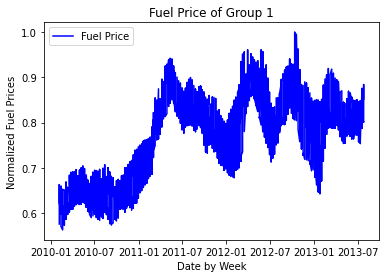

In [ ]:
plt.figure()
g1=plt.plot(group1.Fuel_Price, color= 'blue',label='Fuel Price')
plt.legend(loc='best')
plt.xlabel('Date by Week')
plt.ylabel('Normalized Fuel Prices')
#plt.xlim([datetime.date(2010, 2, 4), datetime.date(2013, 7, 26)])
plt.title('Fuel Price of Group 1')

In [ ]:
#group2
group2 = data.query('Store == 3 or Store == 5 or Store ==  7 or Store == 16 or Store == 30 or Store == 33 or Store == 36 or Store == 37 or Store == 38 or Store == 42 or Store == 43 or Store == 44 ')

In [ ]:
group2=group2.sort_values(by='Date')

In [ ]:
group2=group2[['Date','Fuel_Price']].copy()

In [ ]:
group2.groupby('Date')

In [ ]:
group2.set_index('Date', inplace=True)

In [ ]:
#group3
group3 = data.query('Store == 1 or Store == 8 or Store ==  9 or Store == 10 or Store == 12 or Store == 15 or Store == 18 or Store == 21 or Store == 22 or Store == 23 or Store == 25 or Store == 26 or Store == 29 or Store == 34 or Store == 35 or Store == 40 or Store == 45 ')

In [ ]:
group3=group3.sort_values(by='Date')

In [ ]:
group3=group3[['Date','Fuel_Price']].copy()

In [ ]:
group3.groupby('Date')

In [ ]:
group3.set_index('Date', inplace=True)

In [ ]:
#group_1 = data[(data['Clus_Db'] == 0)]
#group_1.shape

Text(0, 0.5, 'Normalized Fuel Prices')

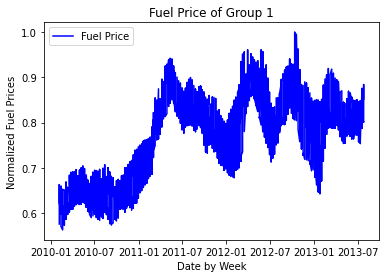

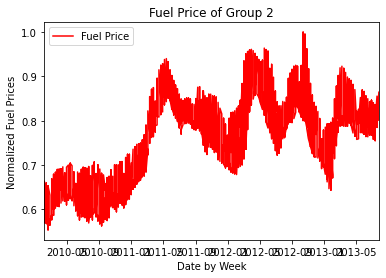

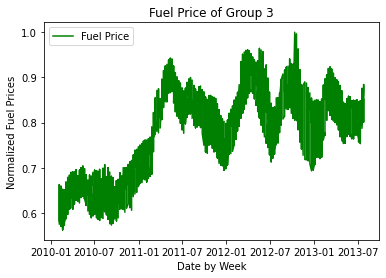

In [ ]:
plt.figure()
g1=plt.plot(group1.Fuel_Price, color= 'blue',label='Fuel Price')
plt.legend(loc='best')
plt.xlabel('Date by Week')
plt.ylabel('Normalized Fuel Prices')
#plt.xlim([datetime.date(2010, 2, 4), datetime.date(2013, 7, 26)])
plt.title('Fuel Price of Group 1')

  

plt.figure()
g2=plt.plot(group2.Fuel_Price, color= 'red',label='Fuel Price')
plt.legend(loc='best')
plt.title('Fuel Price of Group 2')
plt.xlabel('Date by Week')
plt.ylabel('Normalized Fuel Prices')
plt.xlim([datetime.date(2010, 2, 4), datetime.date(2013, 7, 26)])

plt.figure()
g3=plt.plot(group3.Fuel_Price, color= 'green',label='Fuel Price')
plt.legend(loc='best')
plt.title('Fuel Price of Group 3')
plt.xlabel('Date by Week')
plt.ylabel('Normalized Fuel Prices')


In [ ]:
data = data.rename(columns={'Date':'ds', 'Fuel_Price':'ts'})
group1 = group1.rename(columns={'Date':'ds', 'Fuel_Price':'ts'})
group2 = group2.rename(columns={'Date':'ds', 'Fuel_Price':'ts'})
group3 = group3.rename(columns={'Date':'ds', 'Fuel_Price':'ts'})

In [ ]:
group3.head()

,ts
Date,
2010-02-05,0.575649
2010-02-05,0.623993
2010-02-05,0.623993
2010-02-05,0.623993
2010-02-05,0.575649


In [ ]:
def test_stationarity(data, ts):
  # rolling stats
  rolmean = data[ts].rolling(window=12, center=False).mean()
  rolstd = data[ts].rolling(window=12, center=False).std()

  #plot rolling stats
  orig = plt.plot(data[ts], color= 'blue',label='original')
  std = plt.plot(rolstd, color='black', label = 'Rolling Std')
  mean = plt.plot(rolmean, color='red', label='Rolling Mean')

  plt.legend(loc='best')
  plt.title('Rolling Mean & Std Deviation for %s' %(ts))
  plt.xticks(rotation = 45)
  plt.show(block=False)
  plt.close()

  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(data[ts], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)


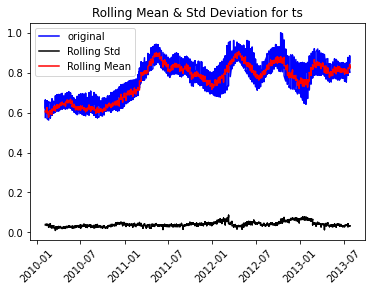

Results of Dickey-Fuller Test:
Test Statistic                   -1.564753
p-value                           0.501271
#Lags Used                       18.000000
Number of Observations Used    2711.000000
Critical Value (1%)              -3.432764
Critical Value (5%)              -2.862607
Critical Value (10%)             -2.567338
dtype: float64


In [ ]:
test_stationarity(group1,'ts')

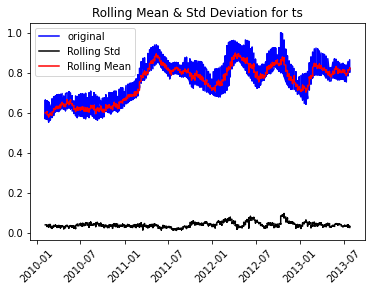

Results of Dickey-Fuller Test:
Test Statistic                   -1.666996
p-value                           0.448192
#Lags Used                       16.000000
Number of Observations Used    2167.000000
Critical Value (1%)              -3.433371
Critical Value (5%)              -2.862875
Critical Value (10%)             -2.567481
dtype: float64


In [ ]:
test_stationarity(group2,'ts')

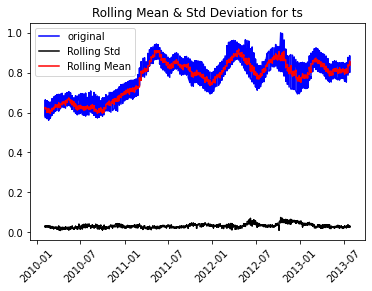

Results of Dickey-Fuller Test:
Test Statistic                   -1.694478
p-value                           0.433960
#Lags Used                       29.000000
Number of Observations Used    3064.000000
Critical Value (1%)              -3.432486
Critical Value (5%)              -2.862484
Critical Value (10%)             -2.567272
dtype: float64


In [ ]:
test_stationarity(group3,'ts')

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
decomposition = seasonal_decompose(group3['ts'], freq= 31, extrapolate_trend=4)

In [ ]:
def plot_decomposition(data, ts, trend, seasonal, resid):
  plt.figure()
  f, ((ax1, ax2), (ax3,ax4))= plt.subplots(2,2, figsize=(15,5), sharex= True)

  ax1.plot(data['ts'], label= 'Original')
  ax1.legend(loc = 'best')
  ax1.tick_params(axis='x', rotation=45)

  ax2.plot(data['trend'], label= 'Trend')
  ax2.legend(loc = 'best')
  ax2.tick_params(axis='x', rotation=45)

  ax3.plot(data['seasonal'], label= 'Seasonality')
  ax3.legend(loc = 'best')
  ax3.tick_params(axis='x', rotation=45)

  ax4.plot(data['resid'], label= 'Residual')
  ax4.legend(loc = 'best')
  ax4.tick_params(axis='x', rotation=45)

  plt.tight_layout()

  plt.show()




In [ ]:
new_data = group3

In [ ]:
new_data.loc[:,'trend']= decomposition.trend
new_data.loc[:,'seasonal']= decomposition.seasonal
new_data.loc[:,'resid']= decomposition.resid

In [ ]:
new_data

,ts,trend,seasonal,resid
Date,,,,
2010-02-05,0.575649,0.607812,-0.005780,-0.026383
2010-02-05,0.623993,0.608122,0.005773,0.010098
2010-02-05,0.623993,0.608433,-0.000400,0.015960
2010-02-05,0.623993,0.608743,0.000005,0.015244
2010-02-05,0.575649,0.609054,0.000678,-0.034082
...,...,...,...,...
2013-07-26,0.810206,0.845414,0.003318,-0.038526
2013-07-26,0.851388,0.845708,0.001246,0.004434
2013-07-26,0.810206,0.846002,-0.002873,-0.032923


<Figure size 432x288 with 0 Axes>

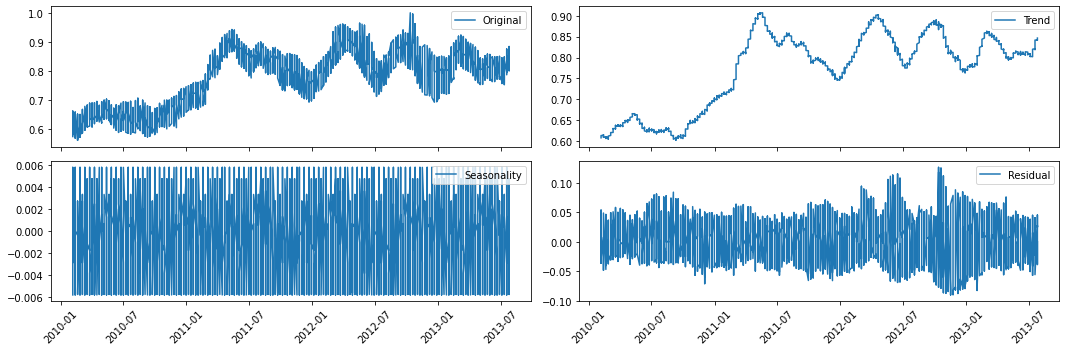

In [ ]:
plot_decomposition(new_data, new_data['ts'], new_data['trend'], new_data['seasonal'], new_data['resid'])

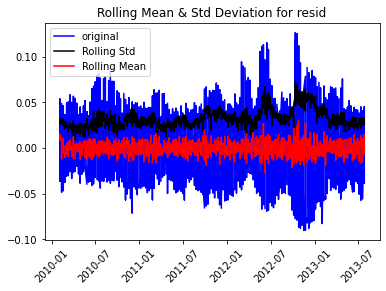

Results of Dickey-Fuller Test:
Test Statistic                -1.766086e+01
p-value                        3.682698e-30
#Lags Used                     2.900000e+01
Number of Observations Used    3.064000e+03
Critical Value (1%)           -3.432486e+00
Critical Value (5%)           -2.862484e+00
Critical Value (10%)          -2.567272e+00
dtype: float64


In [ ]:
test_stationarity(new_data,'resid')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

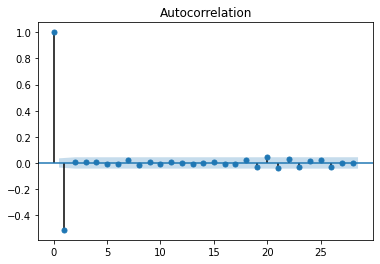

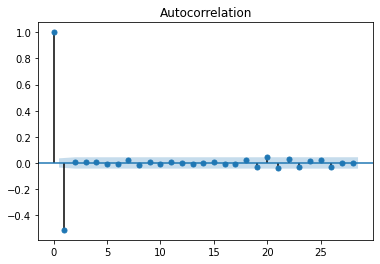

In [ ]:
plot_acf(group3.ts.diff().dropna(), lags=28)

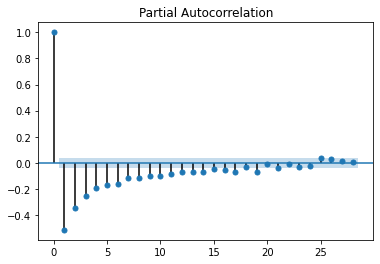

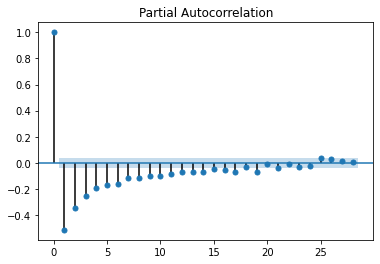

In [ ]:
plot_pacf(group3.ts.diff().dropna(), lags=28)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
def run_arima(data, ts, p, d, q):
  model = ARIMA(data[ts], order=(p,d,q))
  results_arima=model.fit(disp=-1)

  len_results= len(results_arima.fittedvalues)
  ts_modified = data[ts][-len_results:]

  rss = sum((results_arima.fittedvalues - ts_modified)**2)
  rmse = np.sqrt(rss/len(data[ts]))
  print('rmse', rmse)
  plt.figure()
  plt.plot(data[ts])
  plt.plot(results_arima.fittedvalues, color = 'red')

  plt.show()

  return results_arima

In [ ]:
new_data = new_data.fillna(0)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


rmse 0.04288299927883939


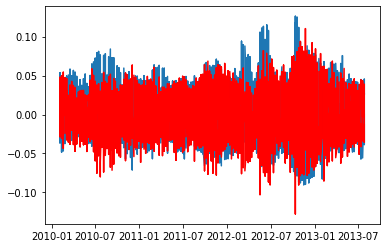

In [ ]:
######################### Run ARIMA on whole data set for fun took 2 hrs############################
model_AR = run_arima(new_data, 'resid', p=2, d=1, q=0)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


rmse 0.04721681402095612


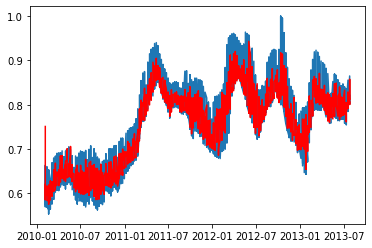

In [ ]:
model_AR2 = run_arima(group2, 'ts', p=3, d=0, q=0)

In [ ]:
my_forcast = model_AR.forecast(5)

In [ ]:
my_forcast2 = model_AR2.forecast(5)

Text(0.5, 1.0, '5 Day Forecast of Fuel Price (G1)')

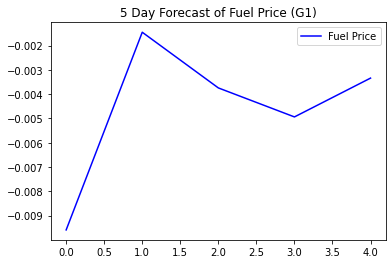

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast[0], color= 'blue',label='Fuel Price')
plt.legend(loc='best')
plt.title('5 Day Forecast of Fuel Price (G1)')


In [ ]:
my_forcast[0]

array([-0.009591  , -0.00145124, -0.00374395, -0.00493804, -0.00333962])

Text(0.5, 1.0, '5 Day Forecast of Fuel Price (G2)')

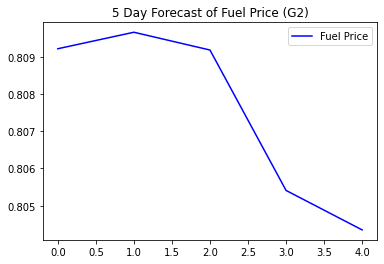

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast2[0], color= 'blue',label='Fuel Price')
plt.legend(loc='best')
plt.title('5 Day Forecast of Fuel Price (G2)')

In [ ]:
my_forcast2[0]

array([0.80921291, 0.8096558 , 0.80917851, 0.80541029, 0.80435101])

Text(0.5, 1.0, 'Error of 5 Day Forecast (G1)')

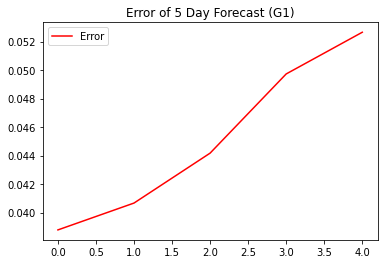

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast[1], color= 'red',label='Error')
plt.legend(loc='best')
plt.title('Error of 5 Day Forecast (G1)')

Text(0.5, 1.0, 'Error of 5 Day Forecast (G2)')

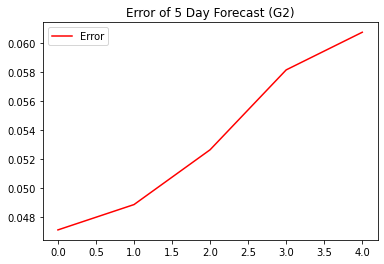

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast2[1], color= 'red',label='Error')
plt.legend(loc='best')
plt.title('Error of 5 Day Forecast (G2)')

Text(0.5, 1.0, '5 Day Confidence Interval (G1)')

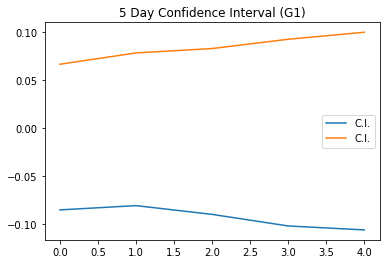

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast[2],label='C.I.')
plt.legend(loc='best')
plt.title('5 Day Confidence Interval (G1)')

Text(0.5, 1.0, '5 Day Confidence Interval (G2)')

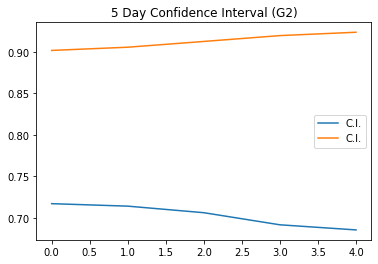

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast2[2],label='C.I.')
plt.legend(loc='best')
plt.title('5 Day Confidence Interval (G2)')

In [ ]:
my_forcast3 = model_AR.forecast(30)

In [ ]:
my_forcast4 = model_AR2.forecast(30)

Text(0.5, 1.0, '30 Day Forecast of Fuel Price (G1)')

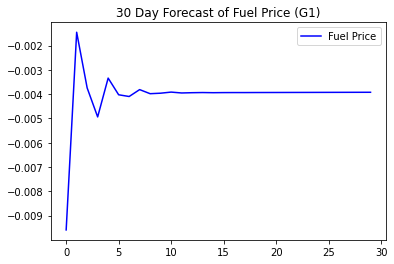

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast3[0], color= 'blue',label='Fuel Price')
plt.legend(loc='best')
plt.title('30 Day Forecast of Fuel Price (G1)')

Text(0.5, 1.0, '30 Day Forecast of Fuel Price (G2)')

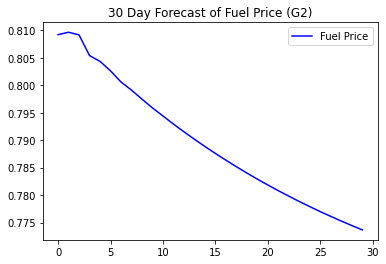

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast4[0], color= 'blue',label='Fuel Price')
plt.legend(loc='best')
plt.title('30 Day Forecast of Fuel Price (G2)')

Text(0.5, 1.0, 'Error of 30 Day Forecast (G1)')

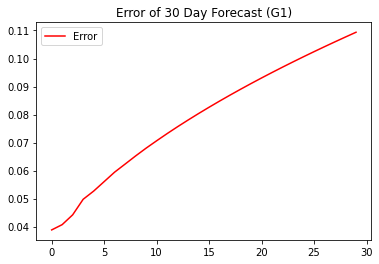

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast3[1], color= 'red',label='Error')
plt.legend(loc='best')
plt.title('Error of 30 Day Forecast (G1)')

Text(0.5, 1.0, 'Error of 30 Day Forecast (G2)')

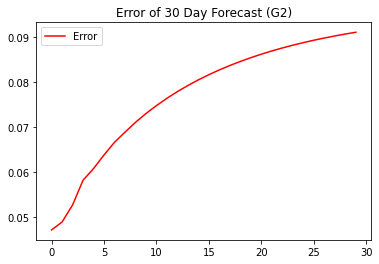

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast4[1], color= 'red',label='Error')
plt.legend(loc='best')
plt.title('Error of 30 Day Forecast (G2)')

Text(0.5, 1.0, '30 Day Confidence Interval (G1)')

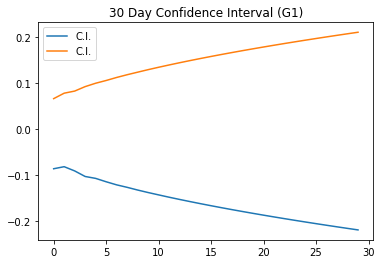

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast3[2],label='C.I.')
plt.legend(loc='best')
plt.title('30 Day Confidence Interval (G1)')

Text(0.5, 1.0, '30 Day Confidence Interval (G2)')

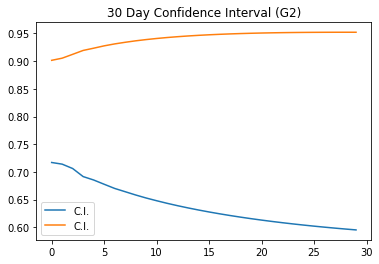

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast4[2],label='C.I.')
plt.legend(loc='best')
plt.title('30 Day Confidence Interval (G2)')

In [ ]:
my_forcast5 = model_AR.forecast(90)

In [ ]:
my_forcast6 = model_AR2.forecast(90)

Text(0.5, 1.0, '90 Day Forecast of Fuel Price (G1)')

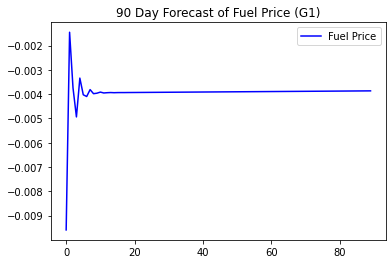

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast5[0], color= 'blue',label='Fuel Price')
plt.legend(loc='best')
plt.title('90 Day Forecast of Fuel Price (G1)')

Text(0.5, 1.0, '90 Day Forecast of Fuel Price (G2)')

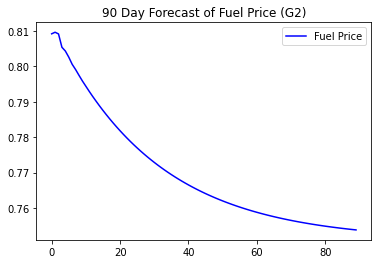

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast6[0], color= 'blue',label='Fuel Price')
plt.legend(loc='best')
plt.title('90 Day Forecast of Fuel Price (G2)')

Text(0.5, 1.0, 'Error of 90 Day Forecast (G1)')

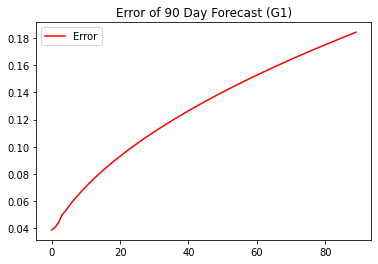

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast5[1], color= 'red',label='Error')
plt.legend(loc='best')
plt.title('Error of 90 Day Forecast (G1)')

Text(0.5, 1.0, 'Error of 90 Day Forecast (G2)')

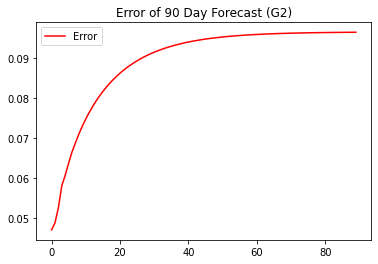

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast6[1], color= 'red',label='Error')
plt.legend(loc='best')
plt.title('Error of 90 Day Forecast (G2)')

Text(0.5, 1.0, '90 Day Confidence Interval (G1)')

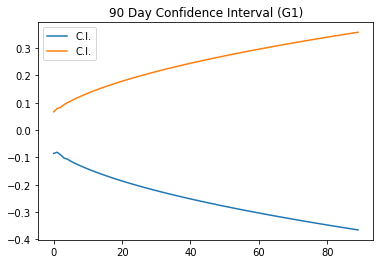

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast5[2],label='C.I.')
plt.legend(loc='best')
plt.title('90 Day Confidence Interval (G1)')

Text(0.5, 1.0, '90 Day Confidence Interval (G2)')

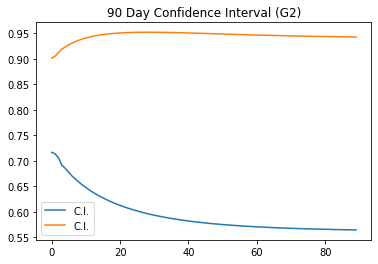

In [ ]:
plt.figure()
fuel=plt.plot(my_forcast6[2],label='C.I.')
plt.legend(loc='best')
plt.title('90 Day Confidence Interval (G2)')